## Subsetting grids using shapefiles.

In [25]:
import pygeogrids.grids as grids
import pygeogrids.shapefile as shapefile
import numpy as np

In [33]:
testgrid = grids.genreg_grid(0.1, 0.1)

We can now subset the 0.1x0.1 degree regular grid with the shapefiles from http://biogeo.ucdavis.edu/data/gadm2.8/gadm28_levels.shp.zip which were downloaded to `~/Downloads/gadm`

In [35]:
austria = shapefile.get_gad_grid_points(testgrid, '/home/cpa/Downloads/gadm/',
                              0, name='Austria')


We can the plot the resulting grid using a simple scatterplot.

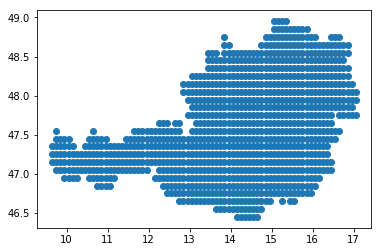

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(austria.arrlon, austria.arrlat)

Behind the scenes this functionality uses the `get_shp_grid_points` function of the grid object.

We can also use this directly using any `ogr.Geometry` object.

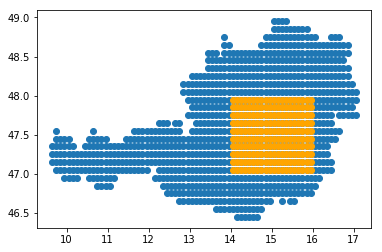

In [42]:
ring = ogr.Geometry(ogr.wkbLinearRing)
ring.AddPoint(14, 47)
ring.AddPoint(14, 48)
ring.AddPoint(16, 48)
ring.AddPoint(16, 47)
ring.AddPoint(14, 47)

poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(ring)
subgrid = austria.get_shp_grid_points(poly)
plt.scatter(austria.arrlon, austria.arrlat)
plt.scatter(subgrid.arrlon, subgrid.arrlat, c='orange')